In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def wrapRad(theta):
    return (theta + np.pi) % (2*np.pi) - np.pi

def hamilton(y,t,e1,e2,r,nu):
    phi, p = y
    dydt = [p, -e1*np.sin(phi) - r*e2*np.sin(r*(phi-nu*t))]
    return dydt

# solve and plot
def phaseSpace(e1, e2, r, nu, ic):
    num = 201  # number of sampled time
    t = np.linspace(0,num-1,num)*2*np.pi/(r*nu)
    
    phi, p = np.zeros((len(ic),num)), np.zeros((len(ic),num))
    for i, y0 in enumerate(ic):
        sol = odeint(hamilton, y0, t, args=(e1,e2,r,nu))
        phi[i] = [wrapRad(x) for x in sol[:,0]]
        p[i] = sol[:,1]
        
    return phi, p

In [3]:
ic = [[x,y] for x in np.linspace(-np.pi, np.pi, 5) for y in np.linspace(-2, 7, 20)]

In [4]:
factor = np.linspace(1,5,num=10)
phi, p = np.zeros((len(factor), 201*100)), np.zeros((len(factor), 201*100))
for i, f in enumerate(factor):
    x, y = phaseSpace(1, 0.2*f, 1, 4, ic)
    phi[i] = np.reshape(x,(1,201*100))[0]
    p[i] = np.reshape(y,(1,201*100))[0]

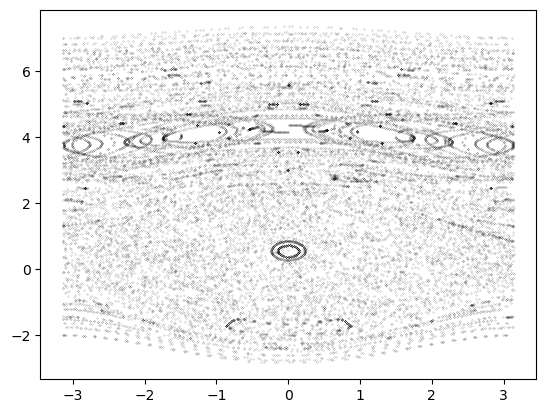

In [5]:
from matplotlib.animation import FuncAnimation, PillowWriter
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    line, = ax.plot(phi[i], p[i], 'k.', ms=0.2)
    
    fac = np.linspace(1,5,num=10)
    ax.set_title(f"epsilon2 = {0.2*fac[i]}")
    return line, 
        
ani = FuncAnimation(fig, animate, interval=1, blit=True, repeat=True, frames=10)    
ani.save("cats-eye.gif", dpi=300, writer=PillowWriter(fps=2)) 